<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/KNN_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN 이론코드

In [ ]:
pip install mglearn

In [4]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
from sklearn.metrics import euclidean_distances
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

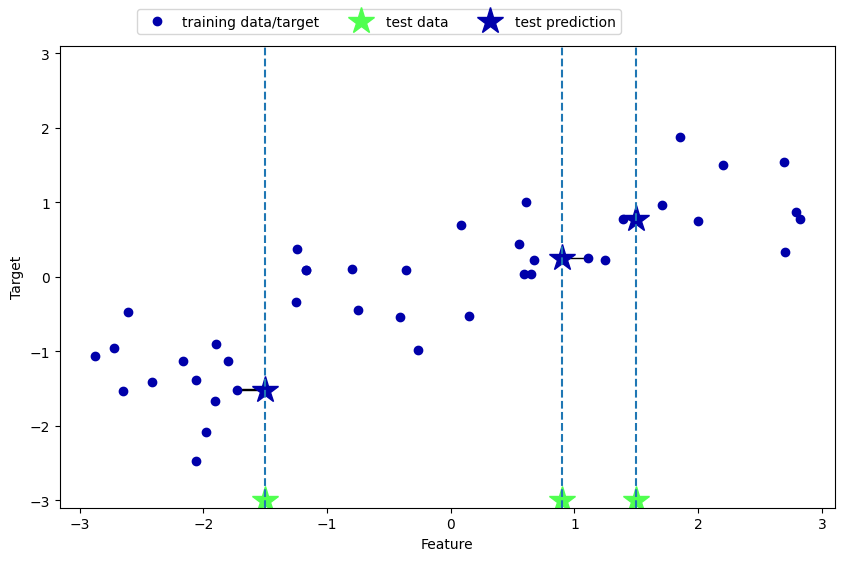

In [5]:
mglearn.plots.plot_knn_regression()
# 이웃이 한 개일 때는 가장 가까운 이웃의 목표값이 예측값이 됩니다.

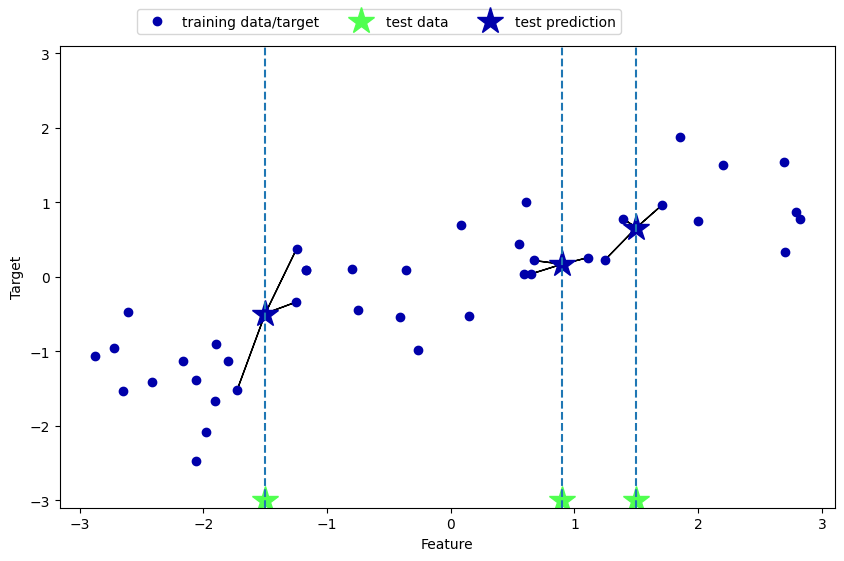

In [3]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
# 이웃이 3개일 때 (n_neighbors=3) 그 다음으로 가까운 이웃으로 보정합니다.

In [8]:
X, y = make_classification(n_samples=30, n_features=2, n_redundant=0,
                           n_informative=1, n_clusters_per_class=1,
                           n_classes=2, random_state=1)

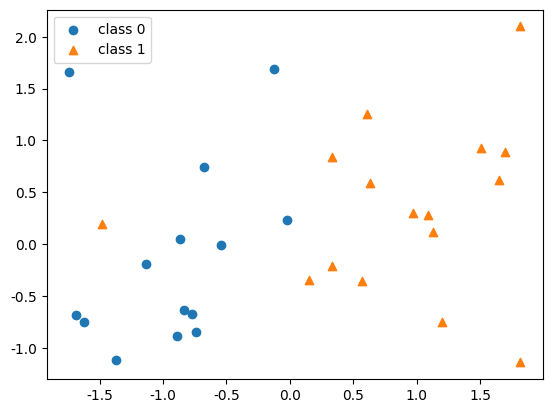

In [9]:
mlp.rcParams['axes.unicode_minus'] = False # 축에 음수 표시
fig, ax = plt.subplots()
ax.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker='o', label='class 0');
ax.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker='^', label='class 1');
ax.legend(loc='best')

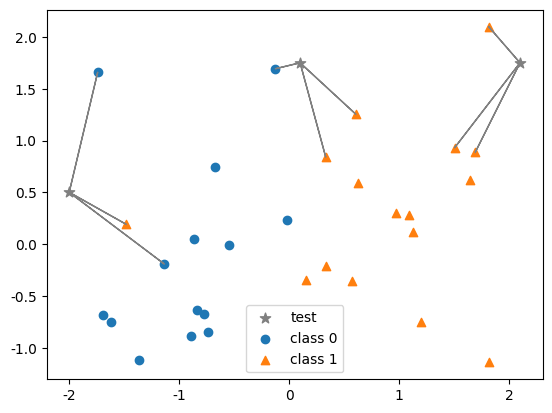

In [10]:
n_neighbors = 3
X_test = np.array([[0.1, 1.75], [-2.0, 0.5], [2.1, 1.75]])

dist = euclidean_distances(X, X_test) # 훈련 집합 X와 테스트 집합 X_test와의 유클리디안 거리 측정
closest = np.argsort(dist, axis=0) # 각 열의 거리가 가장 가까운 순으로 인덱스를 정렬

fig, ax = plt.subplots()
ax.scatter(X_test[:, 0], X_test[:, 1], c='gray', marker='*', s=60, label='test')
ax.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker='o', label='class 0');
ax.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker='^', label='class 1');

for x, neighbors in zip(X_test, closest.T):
    for neighbor in neighbors[:n_neighbors]:
        ax.arrow(x[0], x[1], X[neighbor, 0] - x[0], X[neighbor, 1] - x[1],
                 head_width=0, fc='gray', ec='gray')
        ax.legend(loc='best')

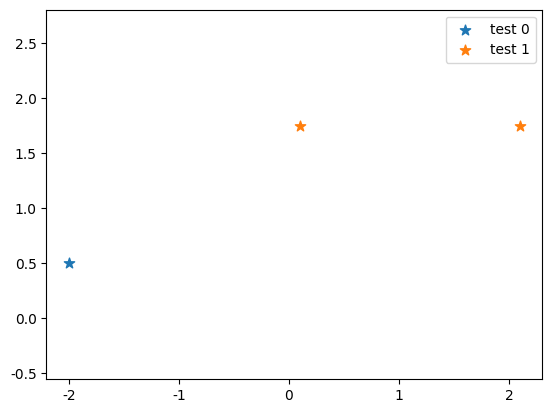

In [11]:
knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
y_pred = knn.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(X_test[:, 0][y_pred == 0], X_test[:, 1][y_pred == 0],
           c='C0', marker='*', s=60, label='test 0');
ax.scatter(X_test[:, 0][y_pred == 1], X_test[:, 1][y_pred == 1],
           c='C1', marker='*', s=60, label='test 1');

ax.axis('equal');
handles, labels = ax.get_legend_handles_labels();
ax.legend(handles=handles, loc='best');
# 왼쪽에 있던 test 는 0으로 예측이 되고, 오른쪽 test 는 클래스 1로 예측이 됨

---

# 방어와 도미 데이터 - KNN 을 이용한 분류학습

## 필요 모듈 import

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 데이터 불러오기
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


## 데이터 탐색 및 전처리

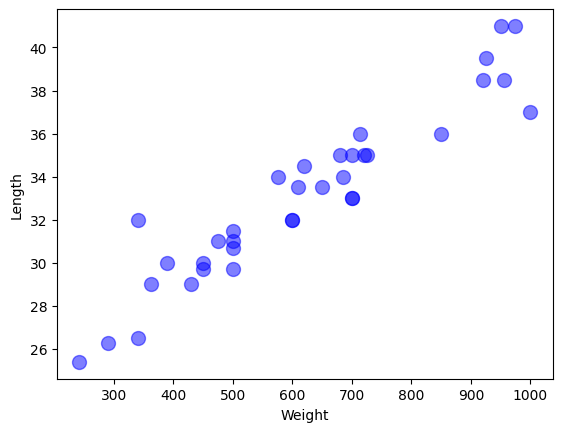

In [14]:
# 데이터프레임에서 원하는 데이터 뽑아내기
bream_data = fish[fish['Species']=='Bream']

plt.plot('Weight', # x
         'Length', # y
         data=bream_data, linestyle='none', marker='o',
         markersize=10, color='blue', alpha=0.5)

plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

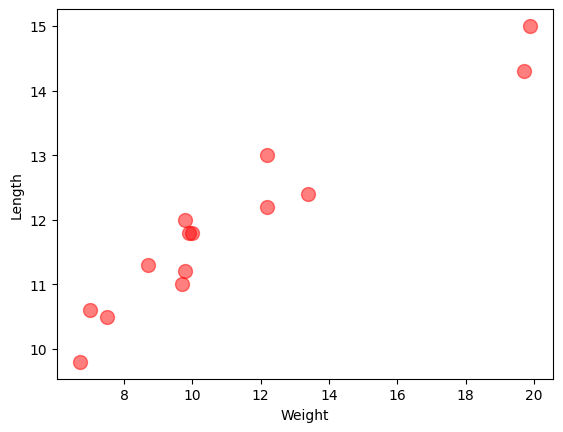

In [15]:
# 데이터프레임에서 원하는 데이터 뽑아내기
bream_data = fish[fish['Species']=='Smelt']

plt.plot('Weight',  # x
         'Length',  # y
         data=bream_data, linestyle='none', marker='o',
         markersize=10, color='red', alpha=0.5)

plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

In [16]:
fish.groupby('Species').count()
# 7종의 물고기

,Weight,Length,Diagonal,Height,Width
Species,,,,,
Bream,35,35,35,35,35
Parkki,11,11,11,11,11
Perch,56,56,56,56,56
Pike,17,17,17,17,17
Roach,20,20,20,20,20
Smelt,14,14,14,14,14
Whitefish,6,6,6,6,6


## 학습 데이터 분리

In [17]:
# 방어와 도미 데이터만 뽑아내기
breamSmelt = fish[(fish['Species'] =='Bream')|(fish['Species']=='Smelt')]
breamSmelt.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [18]:
# 원핫인코딩 간단하게 0,1 분류
breamSmelt['Species'] = breamSmelt['Species'].apply(lambda x : 0 if x =='Bream' else 1)
breamSmelt.head()

<ipython-input-18-9c751ff64c16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breamSmelt['Species'] = breamSmelt['Species'].apply(lambda x : 0 if x =='Bream' else 1)


,Species,Weight,Length,Diagonal,Height,Width
0,0,242.0,25.4,30.0,11.5200,4.0200
1,0,290.0,26.3,31.2,12.4800,4.3056
2,0,340.0,26.5,31.1,12.3778,4.6961
3,0,363.0,29.0,33.5,12.7300,4.4555
4,0,430.0,29.0,34.0,12.4440,5.1340


## 학습, 테스트 데이터 분리

In [43]:
data = breamSmelt[['Length', 'Weight']].values.tolist()
target = list(breamSmelt['Species'].values)

train_input, test_input, train_target, test_target = train_test_split(
    data, target, stratify=target)

test_target

[0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

## 모델 학습

In [40]:
kn = KNeighborsClassifier()
kn.fit(train_input,train_target)
# fish_data 로 최근접 이웃 훈련

KNeighborsClassifier()

In [41]:
kn.score(test_input,test_target)
# 정확도 100% -> 35개의 도미와 14개 빙어 데이터를 모두 원핫인코딩에 저장하고 맞췄기 때문

1.0

---

In [35]:
# 데이터 전처리
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
fish['Species'] = le.fit_transform(fish['Species'])
print(le.classes_) # class 분류 확인

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [36]:
X = fish.drop('Species', axis=1)
y = fish['Species']
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [37]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
# KNN 모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [38]:
# 테스트 데이터 예측
y_pred = knn.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.84375


In [39]:
for i , labels in enumerate(le.classes_):
    print (i, '->', labels)

0 -> Bream
1 -> Parkki
2 -> Perch
3 -> Pike
4 -> Roach
5 -> Smelt
6 -> Whitefish
